# Project 3

In [1]:
include("../AA120Q.jl")
using AA120Q

    .*(Images.AbstractImageDirect, AbstractArray) at /home/tim/.julia/v0.4/Images/src/algorithms.jl:51
is ambiguous with: 
    .*(AbstractArray, Union{DataArrays.DataArray, DataArrays.PooledDataArray}, AbstractArray...) at /home/tim/.julia/v0.4/DataArrays/src/broadcast.jl:290.
To fix, define 
    .*(Images.AbstractImageDirect, Union{DataArrays.DataArray, DataArrays.PooledDataArray})
before the new definition.
    .*(AbstractArray, Images.AbstractImageDirect) at /home/tim/.julia/v0.4/Images/src/algorithms.jl:52
is ambiguous with: 
    .*(Union{DataArrays.DataArray, DataArrays.PooledDataArray}, AbstractArray...) at /home/tim/.julia/v0.4/DataArrays/src/broadcast.jl:290.
To fix, define 
    .*(Union{DataArrays.DataArray, DataArrays.PooledDataArray}, Images.AbstractImageDirect)
before the new definition.
    .==(Images.AbstractImageDirect{Bool, N<:Any}, AbstractArray{Bool, N<:Any}) at /home/tim/.julia/v0.4/Images/src/algorithms.jl:181
is ambiguous with: 
    .==(AbstractArray{Bool, N<:Any},

# Load Data

In [2]:
initial = readtable("initial.txt")

,id,A,L,C1,C2
1,1,4,2.0,2,2
2,2,4,1.0,2,2
3,3,2,1.0,2,2


In [3]:
traces = readtable("traces.txt")
traces[1:3,:]

,id,t,n1,e1,h1,v1,ψ1,n2,e2,h2,v2,ψ2
1,1,0,-8663.356343901081,-334.6189855606665,14645.866200956836,280.548,346.284217,2418.959780457292,5310.203616181479,8058.177403507127,156.281,200.1596029999999
2,1,1,-8470.635911654446,-381.65540917758494,14447.488807708512,280.548,347.013882,2272.253141251274,5256.343492027564,8058.177403507127,156.281,203.01103299999988
3,1,2,-8277.33211172748,-426.23377933392,14249.111414460189,280.548,347.74354700000004,2128.4074835040715,5195.251940170742,8058.177403507127,156.281,205.86246299999988


# Read Encounter

In [4]:
function pull_encounter(initial::DataFrame, traces::DataFrame, id::Int)

    trace1 = Array(AircraftState, 51)
    trace2 = Array(AircraftState, 51)
    
    index_start = findfirst(traces[:id], id)
    for i in 1 : length(trace1)
        j = i + index_start - 1
        @assert(traces[j,:id] == id)
        trace1[i] = AircraftState(traces[j,:n1], traces[j,:e1], traces[j,:h1], traces[j,:v1], traces[j,:ψ1])
        trace2[i] = AircraftState(traces[j,:n2], traces[j,:e2], traces[j,:h2], traces[j,:v2], traces[j,:ψ2])
    end
    
    Δt = traces[2,:t] - traces[1,:t]
    
    Encounter(initial[id, :A], initial[id, :L], initial[id, :C1], initial[id, :C2],
              Δt, trace1, trace2)
end

pull_encounter (generic function with 1 method)

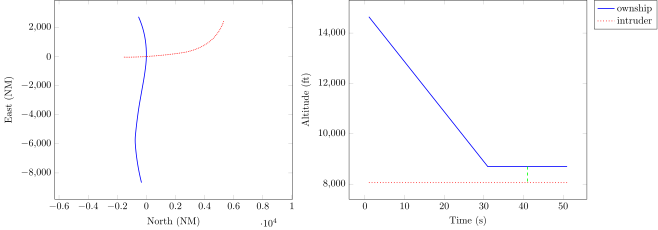

In [5]:
enc = pull_encounter(initial, traces, 1)
plot_encounter(enc)

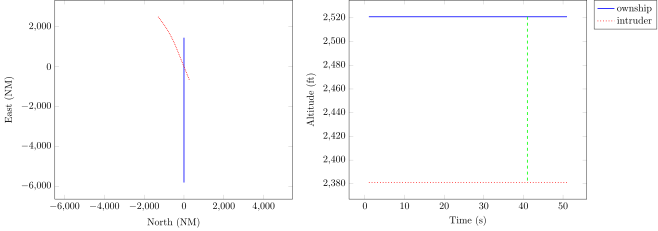

In [6]:
enc = pull_encounter(initial, traces, 2)
plot_encounter(enc)